In [163]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
from IPython.display import Image, display
import pydotplus

In [164]:
# Importing the dataset
userdataset = pd.read_csv('Social Media Ad Data.csv')

In [165]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print()

In [166]:
userdataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [167]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
userdataset['Gender'] = label_encoding.fit_transform(userdataset['Gender'].astype(str))

userdataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [168]:
features = ['User ID', 'Gender','Age','Estimated Salary']


## The Target is the Purchased value

In [169]:
target = userdataset['Purchased']
userdataset.drop( ['Purchased'],axis = 1,inplace = True)
userdataset.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000


## Drop the User ID as it is not required and does not play a key role in Estimating Salary

In [170]:
userdataset.drop( ['User ID'],axis = 1,inplace = True)
userdataset.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


## Gender, Age and Estimated Salary will be used in determined the Purchased (Target)

In [171]:
from sklearn.model_selection import train_test_split

X = userdataset
Y = target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [172]:
model = DecisionTreeClassifier()

In [173]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [174]:
y_pred = model.predict(x_test)

In [175]:
accuracy_score(y_test, y_pred)

0.875

## Summary of Metrics

In [176]:
summarize_classification(y_test,y_pred)

Test data count:  80
accuracy_count :  70
accuracy_score :  0.875
precision_score :  0.8888888888888888
recall_score :  0.7741935483870968



In [185]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  3]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        49
           1       0.89      0.77      0.83        31

    accuracy                           0.88        80
   macro avg       0.88      0.86      0.86        80
weighted avg       0.88      0.88      0.87        80



Text(0.5, 1, 'Confusion matrix')

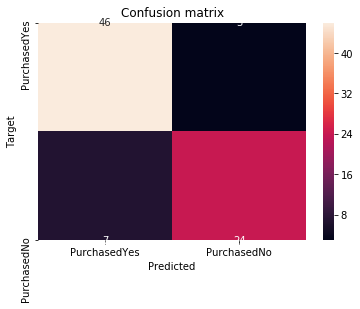

In [177]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['PurchasedYes', 'PurchasedNo'], 
            yticklabels=['PurchasedYes', 'PurchasedNo'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

In [178]:
# class labels
labels = userdataset.columns
labels

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

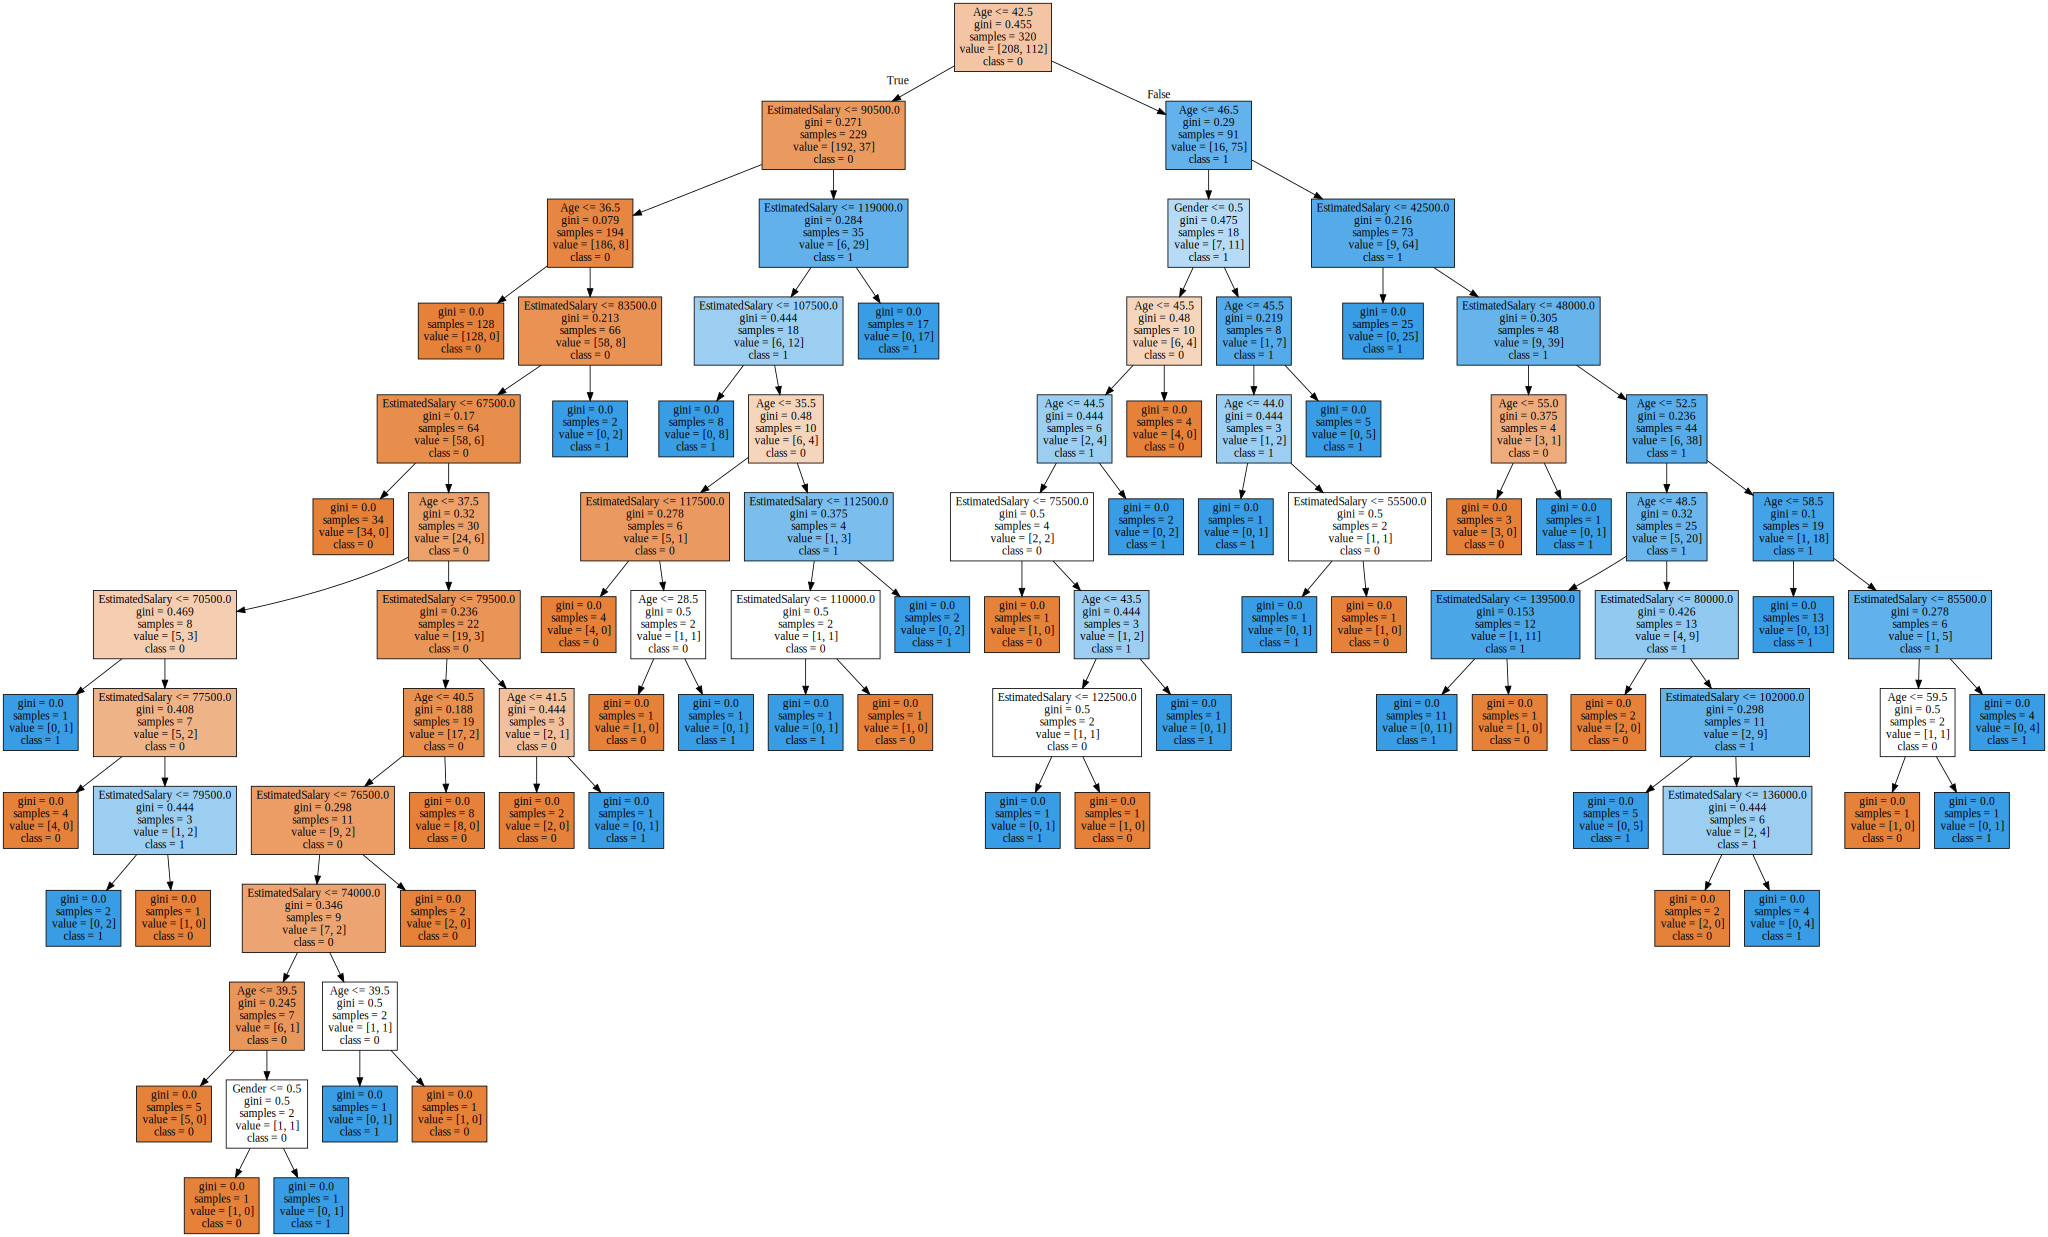

In [179]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [187]:
estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = 'gini'
      , splitter = 'best'
      , max_depth = 5
      , min_samples_split=0.55
      , min_samples_leaf=0.3)


In [188]:
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.3, min_samples_split=0.55,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [190]:
y_pred = estimator.predict(x_test)

In [191]:
accuracy_score(y_test, y_pred)

0.85

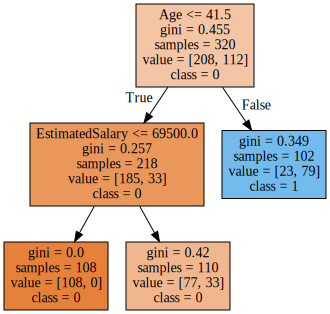

In [192]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Summary of Metrics


In [193]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


summarize_classification(y_test,y_pred)

Test data count:  80
accuracy_count :  68
accuracy_score :  0.85
precision_score :  0.8275862068965517
recall_score :  0.7741935483870968



In [194]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  5]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.83      0.77      0.80        31

    accuracy                           0.85        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



In [196]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    accuracy.append(score)

In [197]:
accuracy

[0.8625, 0.95, 0.9125, 0.9, 0.9125]

## From the above it is clear that accuracy is better for maxdepth = 2 and greater than that